In [8]:
import numpy as np
import scipy.stats as st
import scipy.optimize as opt
import matplotlib.pyplot as plt
import pandas as pd

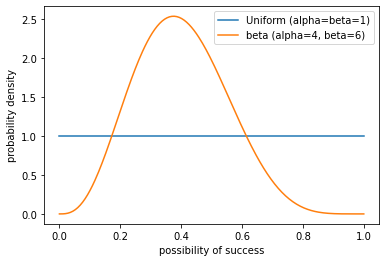

In [4]:
q = np.linspace(0, 1, 250)
plt.plot(q, st.uniform.pdf(q), label='Uniform (alpha=beta=1)')
plt.plot(q, st.beta.pdf(q, 4, 6), label='beta (alpha=4, beta=6)')
plt.xlabel('possibility of success')
plt.ylabel('probability density')
plt.legend()

In [15]:
def bernoulli_stats(data, a0, b0, prob):
    """
    Inuput:
        data: data (0 or 1)
        a0: alpha of prior
        b0: beta of prior
        prob: credible interval
    Returns:
        resutlts: pandas dataframe
        a: alpha of posterior
        b: beta of posterior
    """
    n = data.size
    sum_data = np.sum(data)
    a = sum_data + a0
    b = n - sum_data + b0
    mean_pi = st.beta.mean(a, b)
    median_pi = st.beta.median(a, b)
    mode_pi = (a - 1) / (a + b - 2)
    sd_pi = st.beta.std(a, b)
    ci_pi = st.beta.interval(prob, a, b)

    stats = np.hstack((mean_pi, median_pi, mode_pi, sd_pi, ci_pi))
    stats = stats.reshape((1, 6))
    stats_string = ['mean', 'median', 'mode', 'sd', 'CI (lower)', 'CI (upper)']
    
    param_string = ['possibliity of success (q)']
    results = pd.DataFrame(stats, index=param_string, columns=stats_string)
    return results, a, b

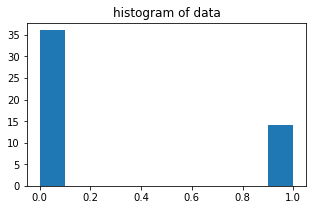

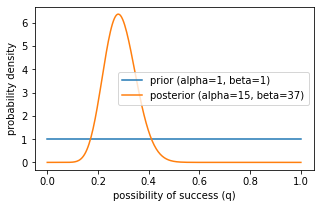

In [27]:
# generate data
p = 0.25
n = 50
np.random.seed(99)
data = st.bernoulli.rvs(p, size=n)
#plot histogram
plt.figure(figsize=(5, 3))
plt.hist(data)
plt.title('histogram of data')
plt.show()

# calculate stats
a0 = 1 # uniform prior
b0 = 1 # uniform prior
prob = 0.95 # credible interval
results, a, b = bernoulli_stats(data, a0, b0, prob)
# plot probability density functions
fig1 = plt.figure(figsize=(5, 3))
q = np.linspace(0, 1, 250)
plt.plot(q, st.beta.pdf(q, a0, b0), label=f'prior (alpha={a0}, beta={b0})')
plt.plot(q, st.beta.pdf(q, a, b), label=f'posterior (alpha={a}, beta={b})')
plt.xlabel('possibility of success (q)')
plt.ylabel('probability density')
plt.legend()
plt.show()


(array([36.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

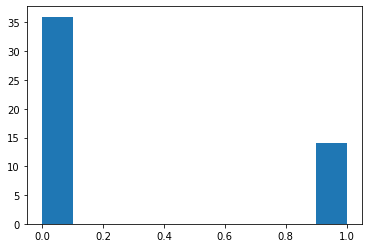

In [18]:
# plot several prior distributions
fig2 = plt.figure(figsize=(5, 3))
q = np.linspace(0, 1, 250)
a0_1 ,b0_1 = 1, 1



